In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import scanpy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from skbio.stats.composition import ilr

brain_gex = sc.read_h5ad('../datasets/mouse_brain/data/gex.h5ad')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [1]:
top_genes = np.argsort(np.array(brain_gex.X.sum(0)).reshape(-1))[-8000:]
brain_gex = brain_gex[:, top_genes]

from kladi.matrix_models.expression_model import ExpressionModel
model = ExpressionModel(brain_gex.var_names.values, initial_counts = 10)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/alynch/miniconda3/envs/torch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
INFO:root:Using CUDA: False


validation_loss = ExpressionModel.param_search(counts = brain_gex.X, genes = brain_gex.var_names.values, num_modules = [10, 15, 20, 25], num_epochs=50)

In [3]:
model.fit(brain_gex.X, use_validation_set=True, num_epochs = 150, eval_every=1)
model.save('brain_model.pth')

INFO:root:Using CUDA: False
INFO:root:Validating data ...
INFO:root:Initializing model ...
INFO:root:Training with 4441 cells, testing with 229.
INFO:root:Training ...
INFO:root:Learning deviance featurization for transcript counts ...
INFO:root:Epoch 1/150 complete. Training loss: 8.747e+04
INFO:root:Test loss: 7.9178e+04
INFO:root:Epoch 2/150 complete. Training loss: 8.018e+04
INFO:root:Test loss: 7.4173e+04
INFO:root:Epoch 3/150 complete. Training loss: 7.483e+04
INFO:root:Test loss: 7.1295e+04
INFO:root:Epoch 4/150 complete. Training loss: 7.102e+04
INFO:root:Test loss: 6.6469e+04
INFO:root:Epoch 5/150 complete. Training loss: 6.767e+04
INFO:root:Test loss: 6.5414e+04
INFO:root:Epoch 6/150 complete. Training loss: 6.447e+04
INFO:root:Test loss: 6.2115e+04
INFO:root:Epoch 7/150 complete. Training loss: 6.127e+04
INFO:root:Test loss: 5.9530e+04
INFO:root:Epoch 8/150 complete. Training loss: 5.840e+04
INFO:root:Test loss: 5.6005e+04
INFO:root:Epoch 9/150 complete. Training loss: 5.587

INFO:root:Test loss: 8.6843e+03
INFO:root:Epoch 87/150 complete. Training loss: 8.682e+03
INFO:root:Test loss: 8.3460e+03
INFO:root:Epoch 88/150 complete. Training loss: 8.595e+03
INFO:root:Test loss: 8.3839e+03
INFO:root:Epoch 89/150 complete. Training loss: 8.555e+03
INFO:root:Test loss: 8.4968e+03
INFO:root:Epoch 90/150 complete. Training loss: 8.531e+03
INFO:root:Test loss: 8.5531e+03
INFO:root:Epoch 91/150 complete. Training loss: 8.529e+03
INFO:root:Test loss: 8.4683e+03
INFO:root:Epoch 92/150 complete. Training loss: 8.513e+03
INFO:root:Test loss: 8.5898e+03
INFO:root:Epoch 93/150 complete. Training loss: 8.506e+03
INFO:root:Test loss: 8.4635e+03
INFO:root:Epoch 94/150 complete. Training loss: 8.508e+03
INFO:root:Test loss: 8.4535e+03
INFO:root:Epoch 95/150 complete. Training loss: 8.475e+03
INFO:root:Test loss: 8.6047e+03
INFO:root:Epoch 96/150 complete. Training loss: 8.488e+03
INFO:root:Test loss: 8.4530e+03
INFO:root:Epoch 97/150 complete. Training loss: 8.491e+03
INFO:root:

In [2]:
model.load('brain_model.pth')

In [4]:
brain_gex.obsm['Z'] = model.predict(brain_gex.X)
brain_gex.layers['imputed'] = model.impute(model.predict(brain_gex.X))

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


INFO:root:Querying Enrichr with module 4 genes.
INFO:root:Downloading results ...


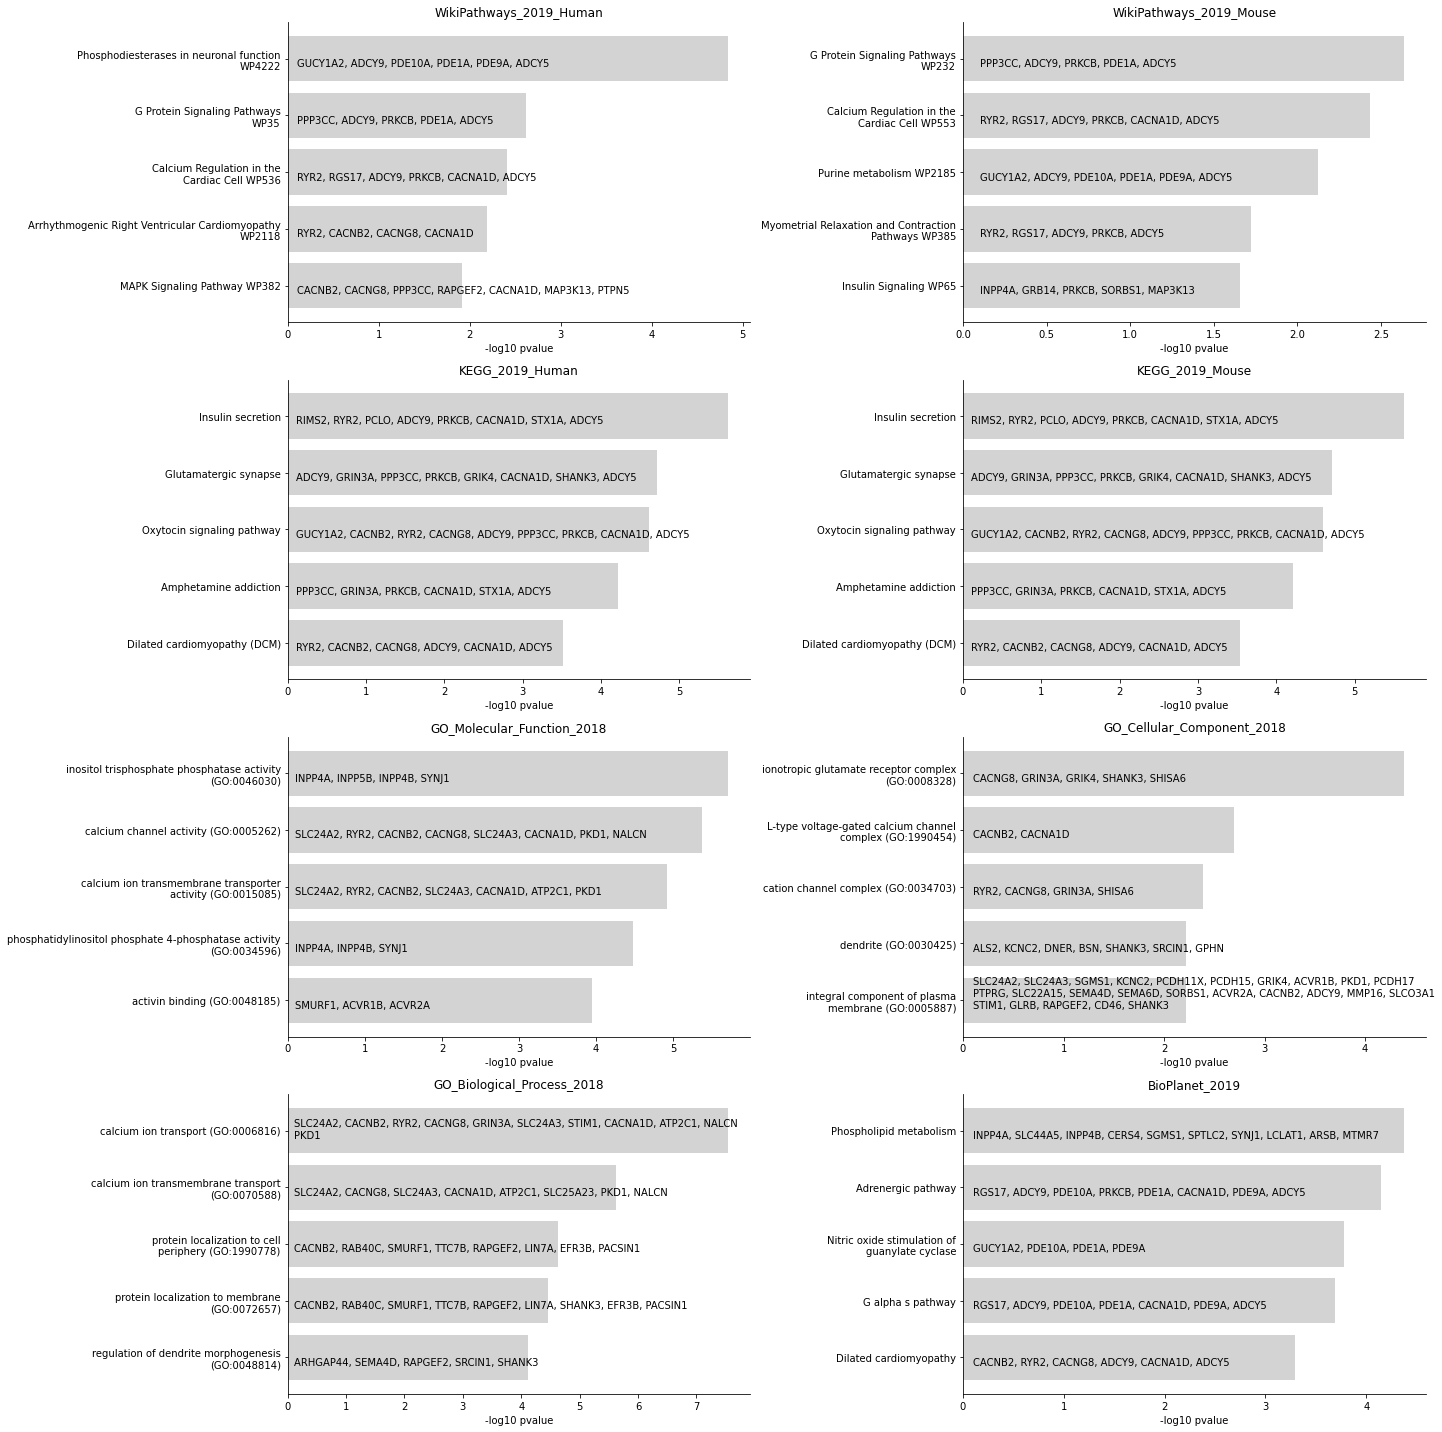

In [25]:
enrichments = model.get_enrichments(model.post_genelist(4))

model.plot_enrichments(enrichments, show_genes=True)

In [6]:
brain_gex.obsm['clr'] = ilr(brain_gex.obsm['Z'])
sc.pp.neighbors(brain_gex, use_rep='clr')

In [7]:
sc.tl.umap(brain_gex, n_components=2)

In [8]:
brain_gex.obs[['Z{}'.format(str(x)) for x in range(brain_gex.obsm['Z'].shape[-1])]] = brain_gex.obsm['Z']

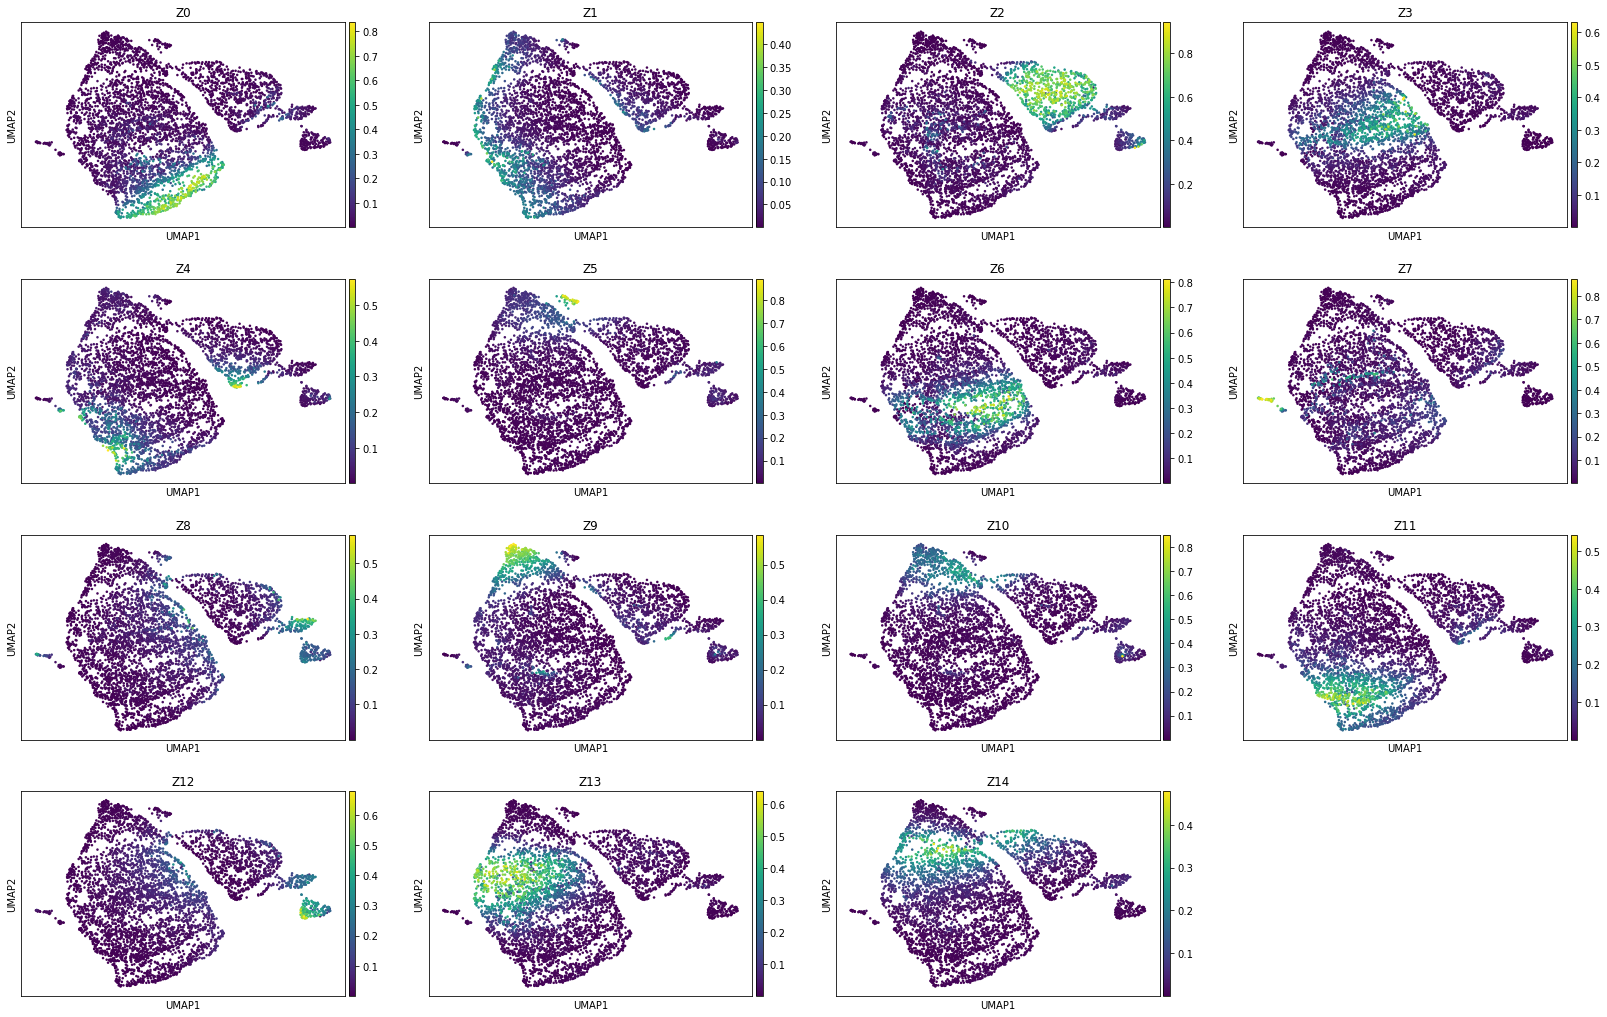

In [9]:
sc.pl.umap(brain_gex, color = ['Z{}'.format(str(x)) for x in range(brain_gex.obsm['Z'].shape[-1])])

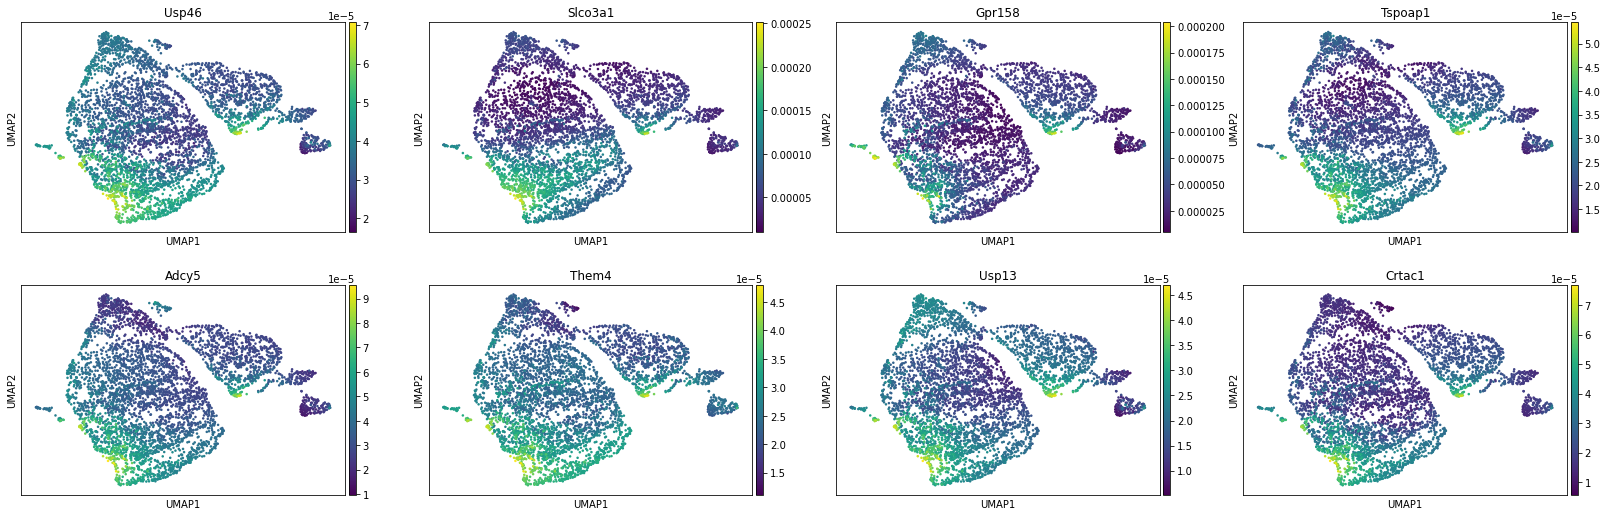

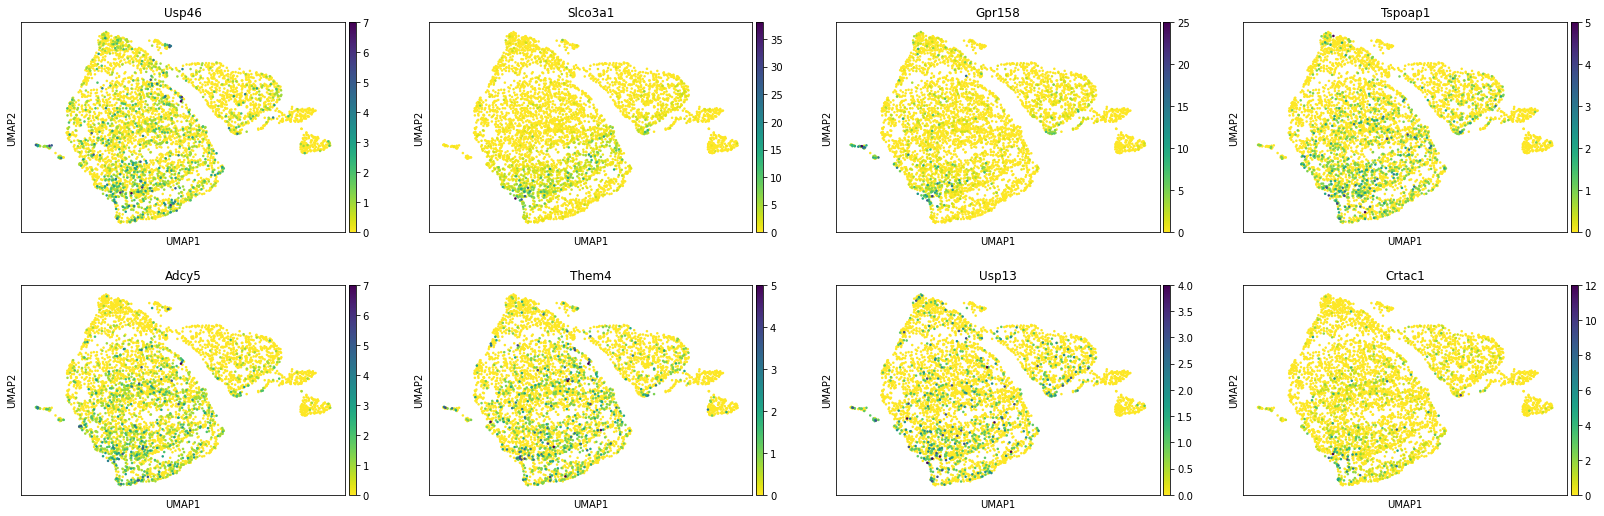

(None, None)

In [24]:
sc.pl.umap(brain_gex, color = model.get_top_genes(4, top_n=8), layer='imputed'), sc.pl.umap(brain_gex, color = model.get_top_genes(4, top_n=8), cmap='viridis_r')